# Check alpha constraints for Powerspectrum

### Import all modules

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import scipy.interpolate as interpolate

import pandas as pd

import scipy.stats
from ast import literal_eval

## Load data

In [2]:
data=np.load("pk_z0.50.npz")

In [3]:
data.files

['k', 'pkrm', 'pkr']

In [4]:
k,pkrm,pr= data["k"],data["pkrm"].T[0],data["pkr"]

## Interpolation

#### 1. scipy.interpolate

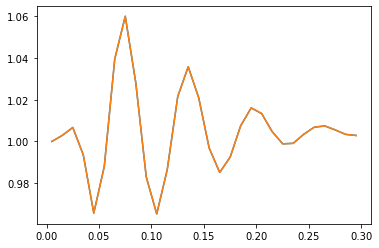

In [5]:
ff=interpolate.interp1d(k,pkrm)
plt.plot(k,pkrm)
plt.plot(k,ff(k))

### Masking at kmin,kmax

In [6]:
kmin=0.005
kmax=0.28
def cutslice(kmin,kmax):
    is_good = np.ones(k.shape[0], '?')
    is_good &= (k > kmin) & (k < kmax)
    kg = k[is_good]
    pg = pkrm[is_good]
    nbins, nmocks = pr[is_good, :].shape
    hartlapf = (nmocks-1.0)/(nmocks-nbins-2.0)
    print(f'kmax={kmax}, kmin={kmin}, nbins={nbins}, nmocks={nmocks}, hf = {hartlapf}')
    cov = np.cov(pr[is_good, :], rowvar=True)*hartlapf/ nmocks
    icov = inv(cov)
    
    return kg,pg,cov,hartlapf

In [7]:
kg,pg,cov,_=cutslice(kmin,0.085)

kmax=0.085, kmin=0.005, nbins=8, nmocks=922, hf = 1.0098684210526316


In [8]:
hf=[]
for j in reversed(k):
    _,_,_,h=cutslice(0.005,j)
    hf.append(h)

kmax=0.2950000000000001, kmin=0.005, nbins=28, nmocks=922, hf = 1.0325112107623318
kmax=0.2850000000000001, kmin=0.005, nbins=27, nmocks=922, hf = 1.0313549832026876
kmax=0.2750000000000001, kmin=0.005, nbins=26, nmocks=922, hf = 1.0302013422818792
kmax=0.26500000000000007, kmin=0.005, nbins=25, nmocks=922, hf = 1.029050279329609
kmax=0.25500000000000006, kmin=0.005, nbins=24, nmocks=922, hf = 1.0279017857142858
kmax=0.24500000000000008, kmin=0.005, nbins=23, nmocks=922, hf = 1.0267558528428093
kmax=0.23500000000000007, kmin=0.005, nbins=22, nmocks=922, hf = 1.0256124721603563
kmax=0.22500000000000006, kmin=0.005, nbins=21, nmocks=922, hf = 1.0244716351501668
kmax=0.21500000000000005, kmin=0.005, nbins=20, nmocks=922, hf = 1.0233333333333334
kmax=0.20500000000000004, kmin=0.005, nbins=19, nmocks=922, hf = 1.0221975582685905
kmax=0.19500000000000003, kmin=0.005, nbins=18, nmocks=922, hf = 1.0210643015521064
kmax=0.18500000000000003, kmin=0.005, nbins=17, nmocks=922, hf = 1.0199335548172

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

## Chi-square test

In [15]:
def chisq(obs, exp, cov):
    delta=np.abs(obs-exp)
    cov_inv=inv(cov)
    return delta.dot(cov_inv.dot(delta))

In [16]:
alp=np.linspace(0.98,1.02,2000)

def chisq_alp(k,alp,cov):
    error=[]
    obs=ff(k)
    for i in alp:
        exp=ff(k*i)
        error.append(np.abs(chisq(obs, exp, cov)))
    return error
    

In [17]:
error=chisq_alp(kg,alp,cov)

In [18]:
np.savez('pk_error.npz', alp=alp, error=error)

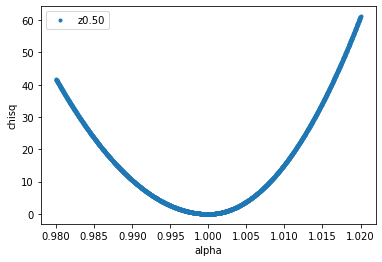

In [19]:
plt.plot(alp,error,".",label="z0.50")
#plt.xlim(0.995,1.005)
#plt.ylim(-0.1,4)
plt.xlabel("alpha")
plt.ylabel("chisq")
plt.legend()
#plt.savefig("chsq.png")

### 2. sigma_alpha vs kmax

In [38]:
alp=np.linspace(0.985,1.015,20000)

kmin=0.005
kmax_min=0.05
kmax_max=0.2
all_errors=[]
all_kmax=[]
for kmax in reversed(np.unique(k)):
    if kmax>kmax_min and kmax<kmax_max:
        ki,pki,covi,_=cutslice(kmin,kmax)
        errori=chisq_alp(ki,alp,covi)
        all_errors.append(errori)
        all_kmax.append(kmax)
        print(kmax,np.min(errori))

kmax=0.19500000000000003, kmin=0.005, nbins=18, nmocks=922, hf = 1.0210643015521064
0.19500000000000003 1.589124750528288e-06
kmax=0.18500000000000003, kmin=0.005, nbins=17, nmocks=922, hf = 1.0199335548172757
0.18500000000000003 1.5394095121525492e-06
kmax=0.17500000000000002, kmin=0.005, nbins=16, nmocks=922, hf = 1.0188053097345133
0.17500000000000002 1.2289997167370881e-06
kmax=0.165, kmin=0.005, nbins=15, nmocks=922, hf = 1.0176795580110498
0.165 1.106088201523104e-06
kmax=0.155, kmin=0.005, nbins=14, nmocks=922, hf = 1.0165562913907285
0.155 1.0544221229962052e-06
kmax=0.145, kmin=0.005, nbins=13, nmocks=922, hf = 1.0154355016538037
0.145 7.529376064258783e-07
kmax=0.13499999999999998, kmin=0.005, nbins=12, nmocks=922, hf = 1.0143171806167401
0.13499999999999998 5.88438579608792e-07
kmax=0.12499999999999997, kmin=0.005, nbins=11, nmocks=922, hf = 1.0132013201320131
0.12499999999999997 4.917662023559357e-07
kmax=0.11499999999999998, kmin=0.005, nbins=10, nmocks=922, hf = 1.0120879

Text(0.5, 0, 'alpha')

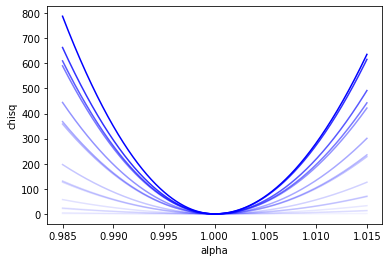

In [39]:
alpha = np.geomspace(1,0.05,len(all_errors))
for i,error in enumerate(all_errors):
    plt.plot(alp,error,alpha=alpha[i],color = 'b')
plt.ylabel("chisq")
plt.xlabel("alpha")
#plt.ylim(-10,3000)
#plt.xlim(0.98,1.02)
#plt.savefig("all_chisq.png")

### 1sigma constriant vs kmax

In [40]:
def find_1sigma(error,llim,rlim):
    least=np.min(error)
    ffe=interpolate.interp1d(alp,error,fill_value="extrapolate")
    alp2=np.linspace(0.985,1.015,2000000)
    print(min(ffe(alp2)))
    ind=np.where((ffe(alp2)<1+least+rlim) & (ffe(alp2)>1+least-llim))
    print(ind)
    left=ind[0][0]
    right=ind[0][-1]
    print(alp2[left],alp2[right])
    return alp2[right]-alp2[left]

In [41]:
sigmaf=[]
count=1
for i in all_errors:
    sigmaf.append(find_1sigma(i,1e-4/count,1e-4/count))
    count=count+0.5

1.5910332191711134e-06
(array([ 964363,  964364,  964365,  964366, 1039663, 1039664, 1039665,
       1039666]),)
0.9994654522327261 1.0005949977974988
1.5400033537996803e-06
(array([ 961161,  961162,  961163, 1040300, 1040301]),)
0.9994174222087111 1.0006045228022613
1.23048269922449e-06
(array([ 959497,  959498, 1045103, 1045104]),)
0.999392462196231 1.0006765678382838
1.1079411950266795e-06
(array([ 958826,  958827, 1047543, 1047544]),)
0.9993823971911986 1.000713167856584
1.0547023563276435e-06
(array([ 952543,  952544, 1048694, 1048695]),)
0.9992881521440761 1.0007304328652165
7.537742855772184e-07
(array([ 947853, 1057624, 1057625]),)
0.999217802108901 1.0008643829321915
5.899801527441472e-07
(array([ 947152,  947153, 1065183, 1065184]),)
0.9992072871036435 1.0009777679888838
4.921595485036376e-07
(array([ 928695,  928696, 1066226, 1066227]),)
0.9989304319652159 1.0009934129967064
3.1577207784774153e-07
(array([ 912648,  912649, 1088990, 1088991]),)
0.9986897268448633 1.0013348731

In [29]:
len(sigmaf)

15

Text(0, 0.5, '1sigma_alpha')

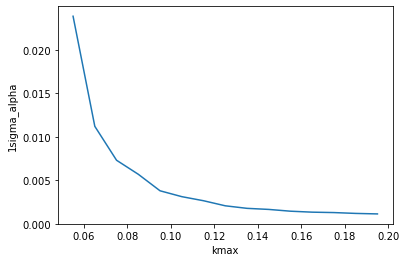

In [42]:
plt.plot(all_kmax,sigmaf)
plt.xlabel("kmax")
plt.ylabel("1sigma_alpha")
#plt.savefig("1sigma_alpha_vs_kmax.png")

In [51]:
np.savez('pk_1sigma.npz', kmax=all_kmax, sigmahf=sigmaf,sigma=sigma,hf=hf[10:25])


In [52]:
data = np.load('pk_1sigma.npz')

In [53]:
df= pd.DataFrame.from_dict({item: data[item] for item in data.files}, orient='index')

In [54]:
df.T

,kmax,sigmahf,sigma,hf
0,0.195,0.001130,0.001118,1.021064
1,0.185,0.001187,0.001175,1.019934
2,0.175,0.001284,0.001272,1.018805
3,0.165,0.001331,0.001319,1.017680
4,0.155,0.001442,0.001430,1.016556
5,0.145,0.001647,0.001634,1.015436
6,0.135,0.001770,0.001758,1.014317
7,0.125,0.002063,0.002049,1.013201
8,0.115,0.002645,0.002629,1.012088
9,0.105,0.003115,0.003098,1.010977


In [56]:
np.array(sigmaf)/np.array(sigma)

array([1.01048013, 1.00992828, 1.00934987, 1.00880106, 1.00824193,
       1.00769273, 1.00714194, 1.00658704, 1.00602441, 1.00548136,
       1.00492482, 1.00437072, 1.00382228, 1.00327328, 1.00272537])

In [61]:
np.sqrt(df.T["hf"]),np.array(sigmaf)/np.array(sigma)

(0     1.010477
 1     1.009918
 2     1.009359
 3     1.008801
 4     1.008244
 5     1.007688
 6     1.007133
 7     1.006579
 8     1.006026
 9     1.005473
 10    1.004922
 11    1.004372
 12    1.003822
 13    1.003273
 14    1.002726
 Name: hf, dtype: float64,
 array([1.01048013, 1.00992828, 1.00934987, 1.00880106, 1.00824193,
        1.00769273, 1.00714194, 1.00658704, 1.00602441, 1.00548136,
        1.00492482, 1.00437072, 1.00382228, 1.00327328, 1.00272537]))